<a href="https://colab.research.google.com/github/sheikhyounus123/module2-solution/blob/main/ResNet_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import itertools


import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model = load_model('/content/drive/MyDrive/data and models/models/resnet_chest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 500
batch_size = 32

#define paths
Infected_path = '/content/drive/MyDrive/data and models/models/Chest_Infected'
nonInfected_path = '/content/drive/MyDrive/data and models/models/Chest_NonInfected'

# Use glob to grab images from path .jpg or jpeg
Infected_files = glob(Infected_path + '/*')
nonInfected_files = glob(nonInfected_path + '/*')

In [ ]:
# Preparing Labels
Infected_labels = []
nonInfected_labels = []

Infected_images=[]
nonInfected_images=[]

import cv2

for i in range(len(Infected_files)):
  image = cv2.imread(Infected_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Infected_images.append(image)
  Infected_labels.append('Chest_Infected')
for i in range(len(nonInfected_files)):
  image = cv2.imread(nonInfected_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  nonInfected_images.append(image)
  nonInfected_labels.append('Chest_NonInfected')

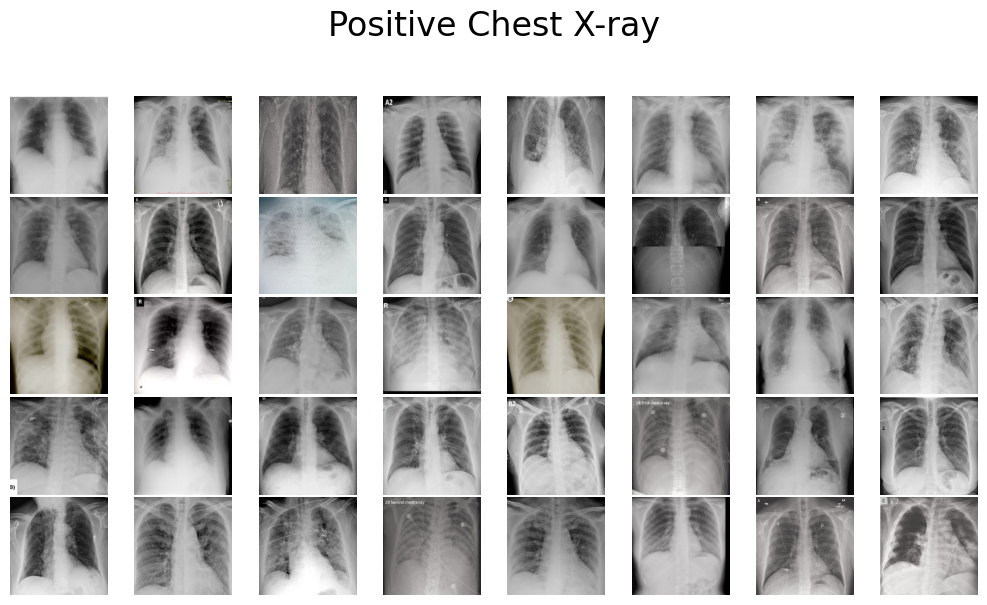

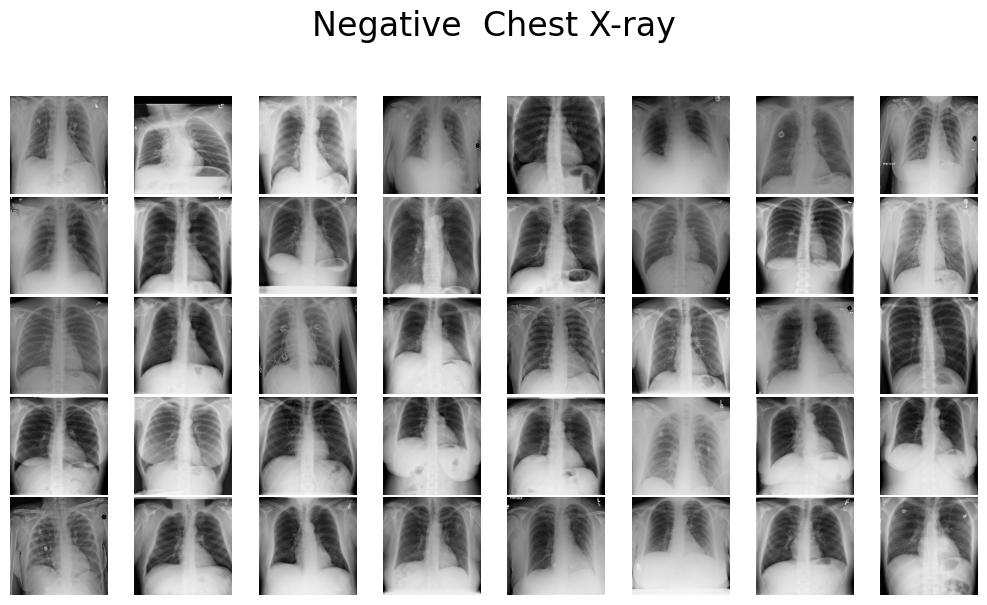

In [ ]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(Infected_images, 'Positive Chest X-ray')
plot_images(nonInfected_images, 'Negative  Chest X-ray')

In [ ]:
# normalize to interval of [0,1]
Infected_images = np.array(Infected_images) / 255
nonInfected_images = np.array(nonInfected_images) / 255


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# split into training and testing
Infected_x_train, Infected_x_test, Infected_y_train, Infected_y_test = train_test_split(
    Infected_images, Infected_labels, test_size=0.2)
nonInfected_x_train, nonInfected_x_test, nonInfected_y_train, nonInfected_y_test = train_test_split(
    nonInfected_images, nonInfected_labels, test_size=0.2)


X_train = np.concatenate((nonInfected_x_train, Infected_x_train), axis=0)
X_test = np.concatenate((nonInfected_x_test, Infected_x_test), axis=0)
y_train = np.concatenate((nonInfected_y_train, Infected_y_train), axis=0)
y_test = np.concatenate((nonInfected_y_test, Infected_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

In [ ]:
# Visualize file variable contents
print("First 5 positive Files: ",Infected_files[0:5])
print("Total Count: ",len(Infected_files))
print("First 5 Negative Files: ",nonInfected_files[0:5])
print("Total Count: ",len(nonInfected_files))

First 5 positive Files:  ['/content/drive/MyDrive/data and models/models/Chest_Infected/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg.jpg', '/content/drive/MyDrive/data and models/models/Chest_Infected/80446565-E090-4187-A031-9D3CEAA586C8.jpeg.jpg', '/content/drive/MyDrive/data and models/models/Chest_Infected/1-s2.0-S0140673620303706-fx1_lrg.jpg.jpg', '/content/drive/MyDrive/data and models/models/Chest_Infected/1-s2.0-S1684118220300682-main.pdf-002-a2.png.jpg', '/content/drive/MyDrive/data and models/models/Chest_Infected/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg.jpg']
Total Count:  414
First 5 Negative Files:  ['/content/drive/MyDrive/data and models/models/Chest_NonInfected/3b4f98fa-8ade-41d8-a4a1-7779a17eac1e.jpg', '/content/drive/MyDrive/data and models/models/Chest_NonInfected/1ee4530d-88fc-4509-8470-42514c98b620.jpg', '/content/drive/MyDrive/data and models/models/Chest_NonInfected/2ef9bafc-c45c-478e-a789-a5e2bfdea8f2.jpg', '/content/drive/MyDrive/data and models/models/Chest_NonIn

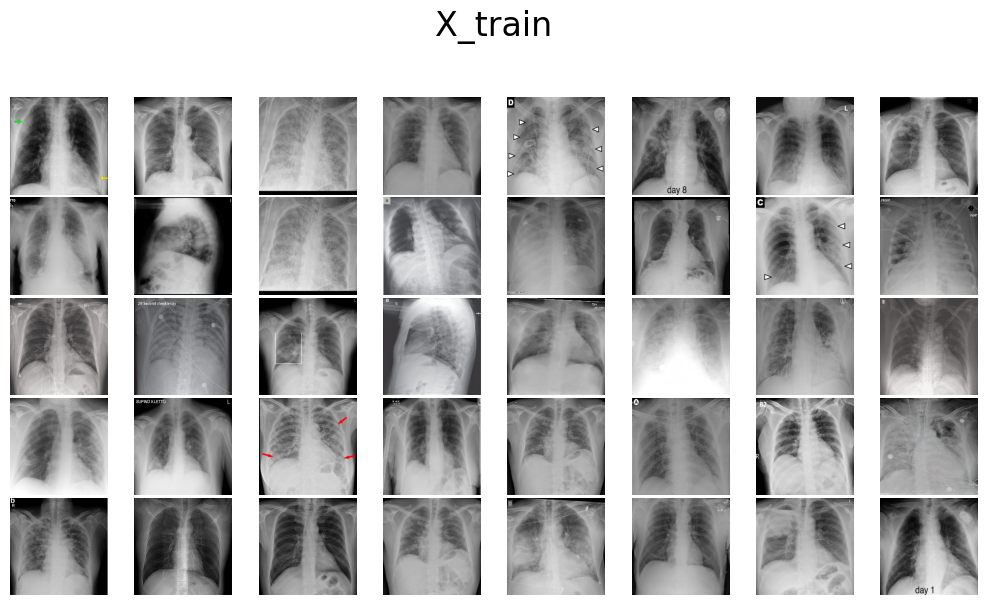

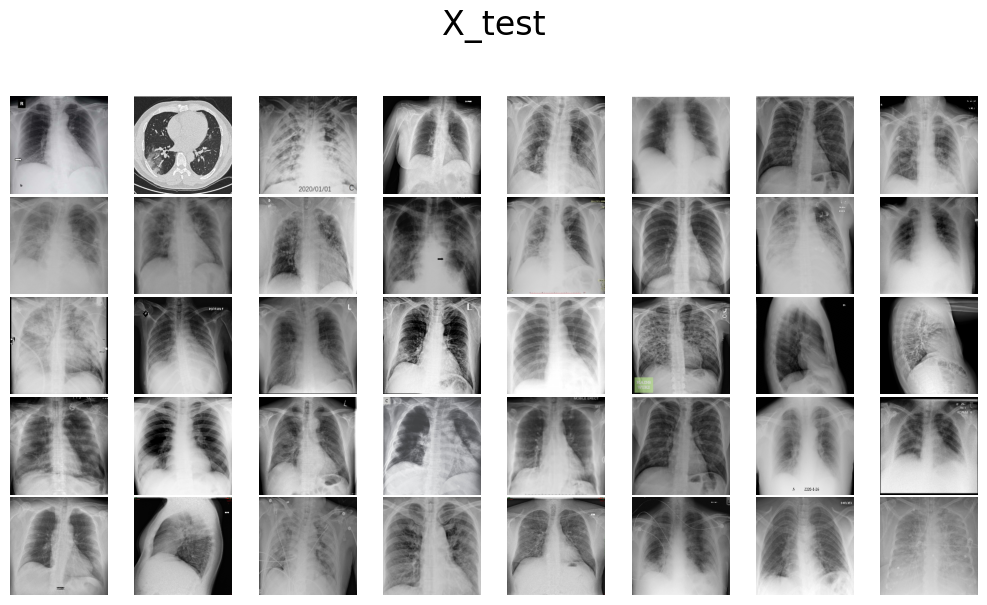

In [ ]:
plot_images(Infected_x_train, 'X_train')
plot_images(Infected_x_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing Infected and NonInfected for X_train and X_test

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)


5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step


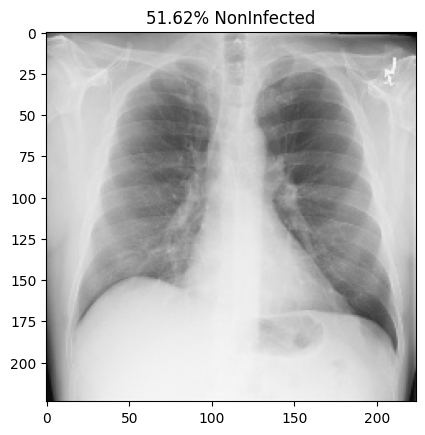

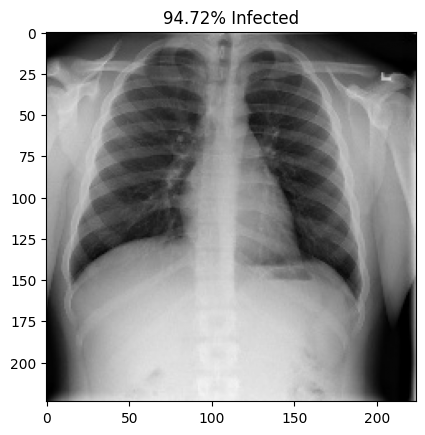

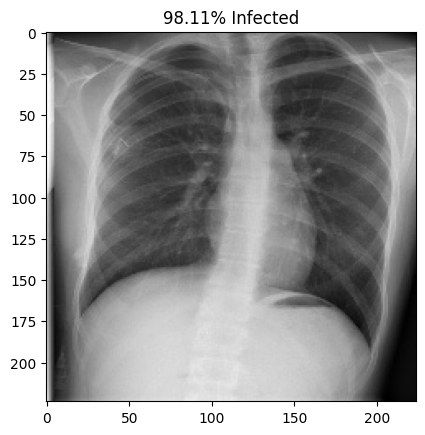

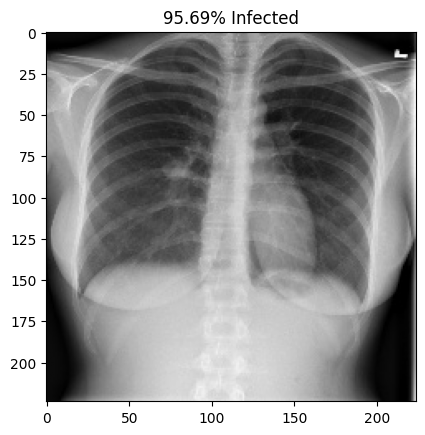

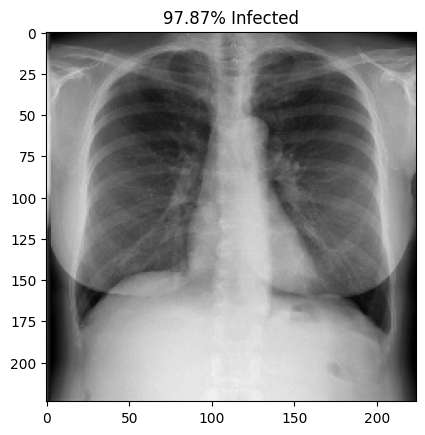

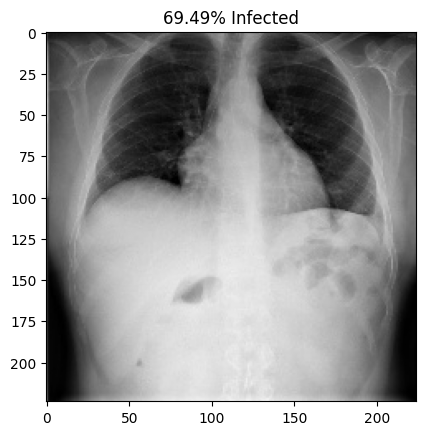

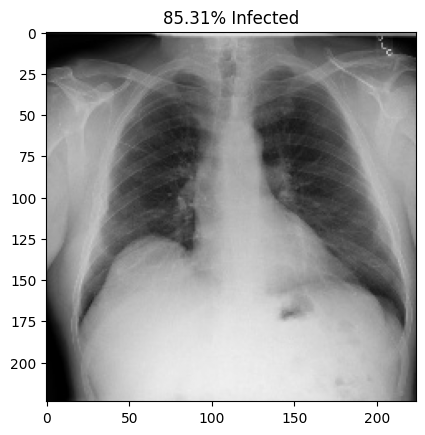

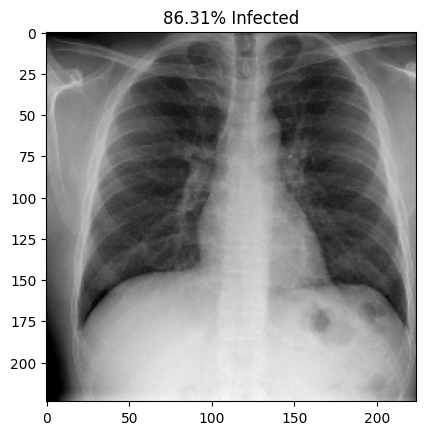

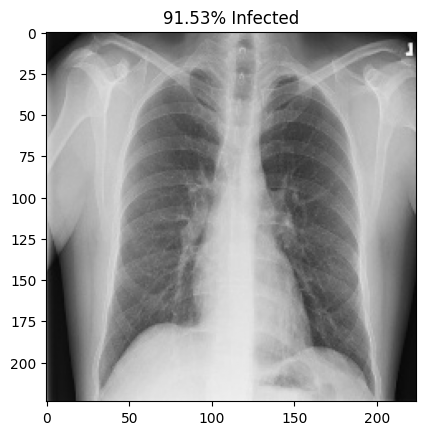

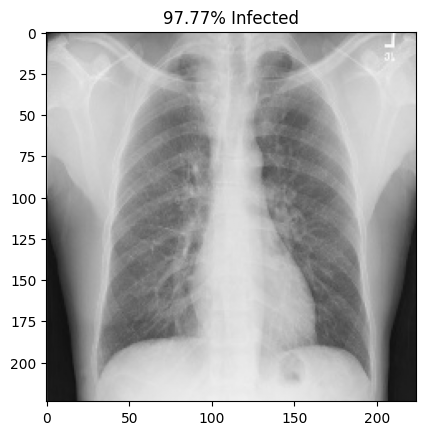

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Infected')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonInfected')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

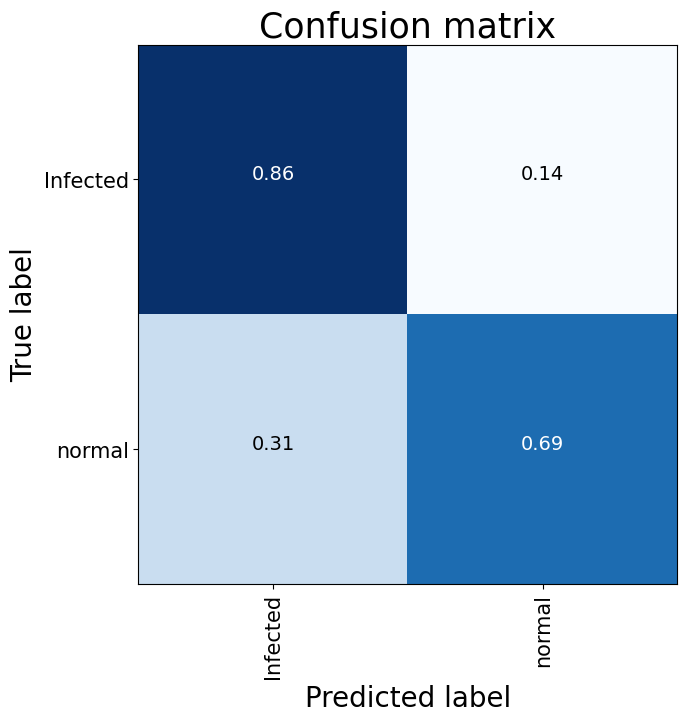

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test_bin, y_pred_bin)
plot_confusion_matrix(cm, classes=['Infected','normal'])
plt.show()

In [ ]:
model = load_model('/content/drive/MyDrive/data and models/models/resnet_chest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
def predict(img):
  img = cv2.imread(img)
  plt.imshow(img)
  img = cv2.resize(img, (224, 224))
  img = img.reshape(1, 224, 224, 3)
  img = img/255
  pred_test = np.argmax(model.predict(img), axis=1)
  if(pred_test==0):
    return "Infected"
  else:
    return "Normal"

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Infected


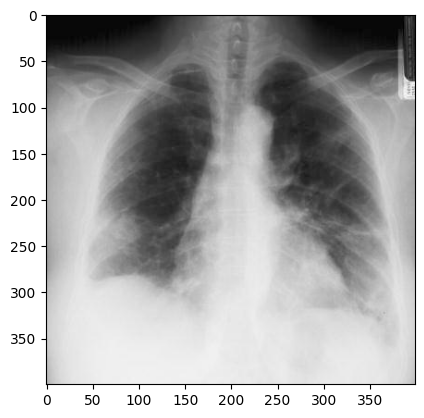

In [ ]:
print(predict('/content/drive/MyDrive/data and models/models/test/xray/+VE XRAY.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Normal


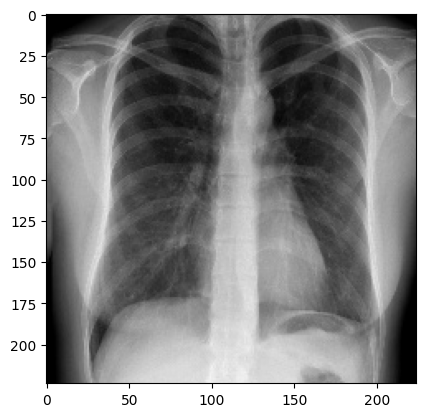

In [ ]:
print(predict('/content/drive/MyDrive/data and models/models/test/xray/NON.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Infected


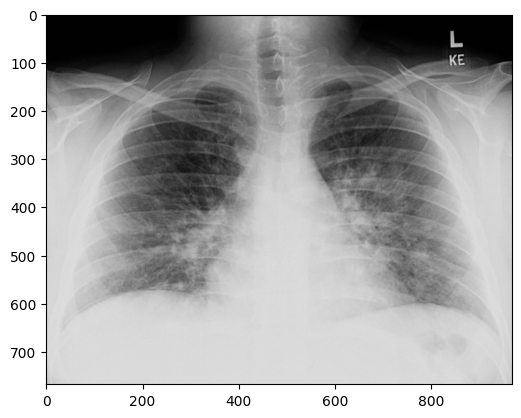

In [ ]:
#Wrong prediction
print(predict('/content/drive/MyDrive/data and models/models/test/xray/normal.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Normal


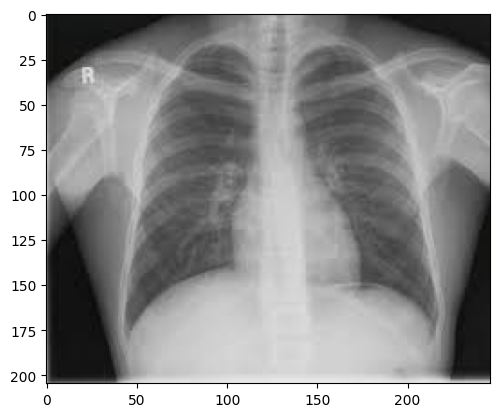

In [ ]:
print(predict('/content/drive/MyDrive/data and models/xray-normal.jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Infected


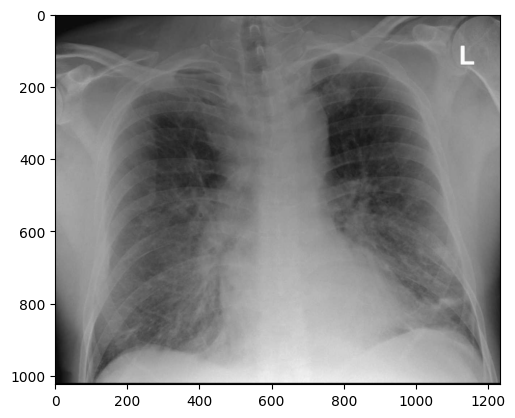

In [ ]:
print(predict('/content/drive/MyDrive/data and models/data/chest/Chest_infected/88de9d8c39e946abd495b37cd07d89e5-2ee6-0.jpg'))